In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Analyzing Movie Reviews

In [3]:
movies = pd.read_csv('fandango_score_comparison.csv')

Let's start by taking a look at the distribution of scores across the sites.

(0, 5)

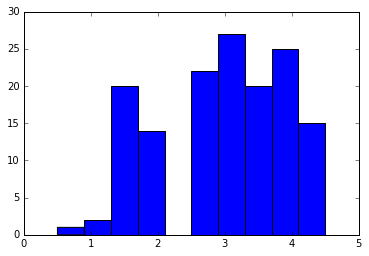

In [4]:
plt.hist(movies["Metacritic_norm_round"])
plt.xlim(0,5)

(0, 5)

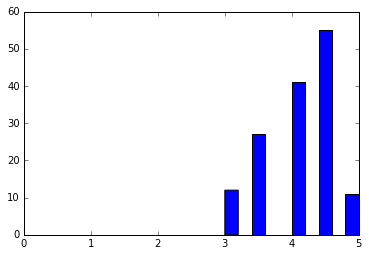

In [9]:
plt.hist(movies["Fandango_Stars"])
plt.xlim(0,5)

The Fandango data doesn't have any movies with a score of less than 3 stars, while the Metacritic score span a much more believable 0.5 to 4.5.

Let's take a look at the average score, median, and standard deviation of scores from each site.

In [12]:
meta_mu = movies["Metacritic_norm_round"].mean()
fan_mu = movies["Fandango_Stars"].mean()
print("Metacritic Mean:",meta_mu, "Fandango Mean:", fan_mu)

Metacritic Mean: 2.97260273973 Fandango Mean: 4.08904109589


In [14]:
meta_med = np.median(movies["Metacritic_norm_round"])
fan_med = np.median(movies["Fandango_Stars"])
print("Metacritic Median:", meta_med, "Fandango Median:", fan_med)

Metacritic Median: 3.0 Fandango Median: 4.0


In [15]:
meta_std = np.std(movies["Metacritic_norm_round"])
fan_std = np.std(movies["Fandango_Stars"])
print("Metacritic SD:", meta_std, "Fandango SD:", fan_std)

Metacritic SD: 0.987561029704 Fandango SD: 0.53853216127


Fandango has a much higher mean and median with much less variance in the scores.

If we look at the scores for the same films we see that several films with low Metacritic scores have much higher Fandango scores.

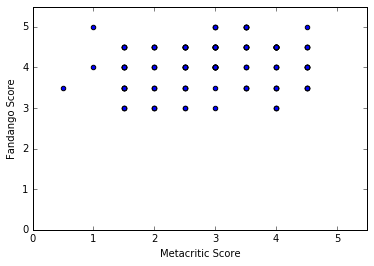

In [22]:
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
plt.xlim(0,5.5)
plt.ylim(0,5.5)
plt.xlabel("Metacritic Score")
plt.ylabel("Fandango Score")

In [23]:
movies["fm_diff"] = movies["Metacritic_norm_round"] - movies["Fandango_Stars"] 
movies["fm_diff"] = np.absolute(movies["fm_diff"])

In [28]:
movies["fm_diff"].head()

0    1.5
1    1.5
2    2.0
3    4.0
4    2.0
Name: fm_diff, dtype: float64

The following movies have the largest difference in rating when comparing Metacritic and Fandango.

In [32]:
movies.sort_values("fm_diff", ascending=False)[["FILM", "fm_diff"]].head()

,FILM,fm_diff
3,Do You Believe? (2015),4.0
85,Little Boy (2015),3.0
47,Annie (2014),3.0
19,Pixels (2015),3.0
134,The Longest Ride (2015),3.0


In [9]:
from scipy import stats

In [10]:
stats.pearsonr(movies["Metacritic_norm_round"], movies["Fandango_Stars"])[0]

0.17844919073895918

The correlation between rating from each site is fairly low, which isn't what you would expect given all things equal. 

In [11]:
slope, intercept, r_value, p_value, std_err = stats.linregress(movies["Metacritic_norm_round"], movies["Fandango_Stars"])

In [12]:
pred_3 = (3 * slope + intercept)

A movie that is givien a 3.0 score on Metacritic is predicted to score 4.09 on Fandango given this data.

In [13]:
pred_3

4.0917071528212041

In [42]:
x = [1.0,5.0]
pred_1 = (slope + intercept)
pred_5 = (5 * slope + intercept)
y = [pred_1, pred_5]

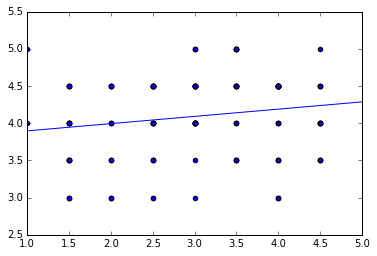

In [43]:
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
plt.plot(x,y)
plt.xlim(1,5)
plt.show()

Here are some potential next steps:

+ Explore the other rating services, IMDB and RottenTomatoes.
+ See how they differ from each other.
+ See how they differ from Fandango.
+ See how user scores differ from critic scores.
+ Acquire more recent review data, and see if the pattern of Fandango inflating reviews persists.
+ Dig more into why certain movies had their scores inflated more than others.